In [5]:
# install pip packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install networkx

  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.11.4-cp311-cp311-win_amd64.whl (44.1 MB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [7]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.linear_model import LogisticRegression

In [8]:
df = pd.read_csv('./train.csv')

In [9]:
# EDA

df.head()
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

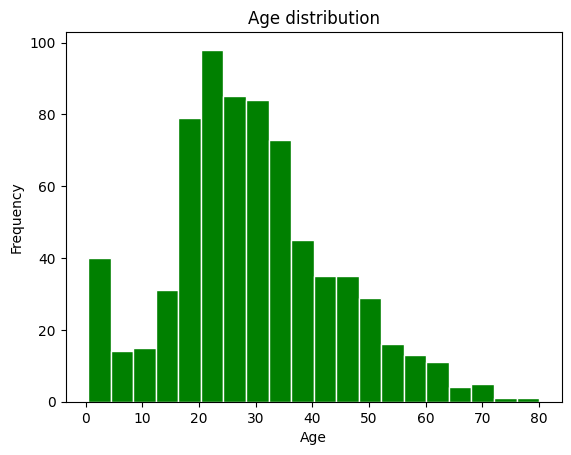

In [10]:
# Visualize the dataset

# Plot a histogram of the age distribution
plt.hist(df["Age"], bins=20, color="green", edgecolor="white")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

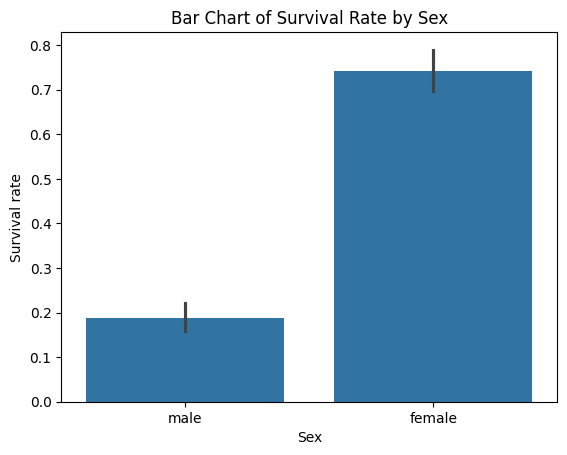

In [12]:
# Plot a bar chart of the survival rate by sex

sns.barplot(x="Sex", y="Survived", data=df)
plt.xlabel("Sex")
plt.ylabel("Survival rate")
plt.title("Bar Chart of Survival Rate by Sex")
plt.show()

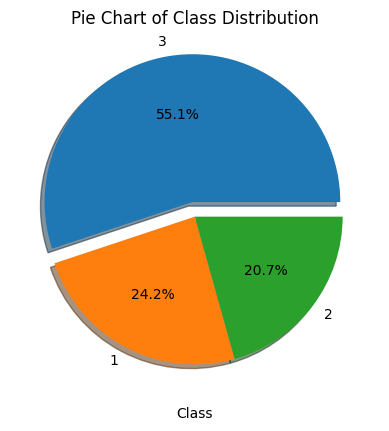

In [14]:
# Plot a pie chart of the class distribution

df["Pclass"].value_counts().plot.pie(autopct="%1.1f%%", explode=[0.1, 0, 0], shadow=True)
plt.xlabel("Class")
plt.ylabel("")
plt.title("Pie Chart of Class Distribution")
plt.show()

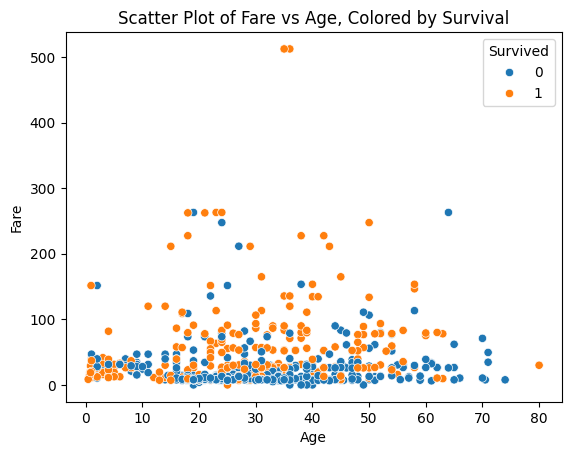

In [15]:
# Plot a scatter plot of the fare vs age, colored by survival

sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Fare vs Age, Colored by Survival")
plt.show()

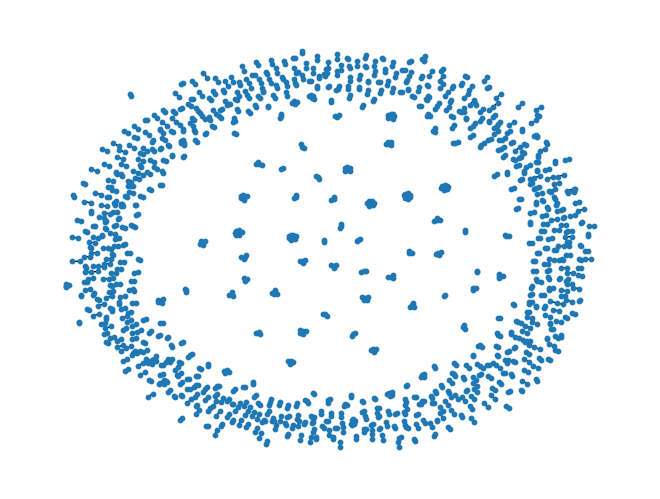

In [17]:
# Plot a graph of the social network of the passengers, based on their names and ticket numbers

G = nx.Graph() # create an empty graph
for i, row in df.iterrows(): # iterate over the rows of the dataset
    name = row["Name"] # get the name of the passenger
    ticket = row["Ticket"] # get the ticket number of the passenger
    G.add_node(name) # add the name as a node to the graph
    G.add_edge(name, ticket) # add an edge between the name and the ticket to the graph
nx.draw(G, with_labels=False, node_size=10) # draw the graph with some parameters
plt.show()

In [20]:
# Analyze the dataset
# Calculate the correlation matrix of the numerical columns
numeric_columns = df.select_dtypes(include=np.number)
corr = numeric_columns.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [21]:
# Find the most common name among the passengers
df["Name"].mode()

0                        Abbing, Mr. Anthony
1                Abbott, Mr. Rossmore Edward
2           Abbott, Mrs. Stanton (Rosa Hunt)
3                        Abelson, Mr. Samuel
4      Abelson, Mrs. Samuel (Hannah Wizosky)
                       ...                  
886                  de Mulder, Mr. Theodore
887                de Pelsmaeker, Mr. Alfons
888                del Carlo, Mr. Sebastiano
889          van Billiard, Mr. Austin Blyler
890              van Melkebeke, Mr. Philemon
Name: Name, Length: 891, dtype: object

In [23]:
# The average fare paid by the survivors and the non-survivors
df.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [27]:
# The passengers who have the same ticket number but different names
df[df.duplicated("Ticket", keep=False)].sort_values("Ticket")

# Could we get the relation of the passengers' names with having the same ticket number?


,Name,Ticket
257,"Cherry, Miss. Gladys",110152
759,"Rothes, the Countess. of (Lucy Noel Martha Dye...",110152
504,"Maioni, Miss. Roberta",110152
262,"Taussig, Mr. Emil",110413
558,"Taussig, Mrs. Emil (Tillie Mandelbaum)",110413
...,...,...
736,"Ford, Mrs. Edward (Margaret Ann Watson)",W./C. 6608
86,"Ford, Mr. William Neal",W./C. 6608
147,"Ford, Miss. Robina Maggie ""Ruby""",W./C. 6608
540,"Crosby, Miss. Harriet R",WE/P 5735


In [29]:
# Predict the survival of the passengers using a machine learning model
# Preprocess the dataset
df = df.drop(["Name", "Ticket", "Cabin"], axis=1) # drop the columns that are not relevant for the prediction
df = df.dropna() # drop the rows that have missing values
df["Sex"] = df["Sex"].map({"male": 0, "female": 1}) # encode the sex column as a binary variable, where 0 means male and 1 means female
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2}) # encode the embarked column as a categorical variable, where 0 means Southampton, 1 means Cherbourg, and 2 means Queenstown

In [31]:
# Split the dataset into features and target
X = df.drop("Survived", axis=1) # the features are all the columns except the survived column
y = df["Survived"] # the target is the survived column

In [32]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split # import the function to split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the dataset into 80% training and 20% testing sets, with a fixed random state for reproducibility

In [33]:
# Train the machine learning model
model = LogisticRegression() # create a logistic regression model
model.fit(X_train, y_train) # fit the model on the training set

e:\Development\data-analysis\titanic\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# Evaluate the machine learning model
model.score(X_test, y_test)

0.7832167832167832

In [38]:
# Make predictions with the machine learning model
model.predict([[1, 0, 22, 1, 0, 7.25, 0]])



e:\Development\data-analysis\titanic\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)